In [42]:
#TODO if 15th is weekend or holiday, take next available day
# If investment is larger than value of shares, incorporate into gain
#Rolling Y/Y change

import yfinance as yf
import pandas as pd
import numpy as np
import math
import itertools
import datetime

#xei, tec, xeqt

#Strategies[tuple(sorted(('BITO', )))]

#Payment company stock tickers: #, 'TOST', 'FI'
# List of stock tickers 
tickers = ['USIO']#'SU.TO', 'XOM', 'SMH', 'XMMO', 'EPI', 'NVDL', 'BITX', 'BITO', 'FNGU','UPRO', 'TQQQ', , 'SPMO', 'BULZ', 'TQQQ', 'SMH', 'XMMO', 'EPI'#, 'QDV5' # tickers = ['VOO', 'IVV',  'SPLG', 'SPY']#, 'BITX', 'NVDL'
#tickers = ['XEI.TO', 'TEC.TO', 'XEQT.TO']

start_date = pd.to_datetime('2024-06-01')
end_date = pd.to_datetime('2024-08-01')
dfGlobalOpen = pd.DataFrame(columns = ['Date'])

Strategies = {}
dfGlobal = []
globalMap = {}
combinations = []

#Assume purchased shares on Daily Open
#Value based on value at open
cash = 1500
transactionFee = 10
day_of_month = 14

for splits in range(1, 4):
#for splits in range(1, len(tickers)):
    combinations.extend([tuple(sorted(i)) for i in list(itertools.combinations(tickers, splits))])


for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Open'] = np.ceil(data['Open']*100)/100
    data = data.rename(columns = {'Open': ticker + ' Open'})
    globalMap[ticker] = data.reset_index()
    dfGlobalOpen = dfGlobalOpen.merge(globalMap[ticker][['Date', ticker + ' Open']], on = 'Date', how = 'outer')

Strategies[combinations[0]] = pd.DataFrame(columns = ['Date'])
for x in combinations:
    Strategies[x] = pd.DataFrame(columns = ['Date'])
    Strategies[x] = Strategies[x].merge(dfGlobalOpen[['Date'] + [i + ' Open' for i in x]], on = 'Date', how = 'outer')
    Strategies[x].dropna(inplace = True)
    
    #Strategies[x]['Cash'] = cash when date is the 15th of the month
    Strategies[x]['Investment'] = 0
    Strategies[x]['Investment'] = np.where(Strategies[x]['Date'].dt.day == 15, cash, 0)

    # for year in Strategies[x]['Date'].dt.year.unique():

    #     for month in Strategies[x]['Date'].dt.month.unique():
    #         #print(Strategies[x]['Date'][Strategies[x]['Date'].dt.month == month].iloc[day_of_month])
    #         Strategies[x]['Investment'] = np.where(Strategies[x]['Date'] == Strategies[x]['Date'][Strategies[x]['Date'].dt.month == month].iloc[day_of_month], cash, 0)
    #         #Strategies[x]['Investment'] = np.where(Strategies[x]['Date'] == Strategies[x]['Date'][(Strategies[x]['Date'].dt.month.isin(Strategies[x]['Date'].dt.year.unique())) & (Strategies[x]['Date'].dt.month.isin(Strategies[x]['Date'].dt.month.unique()))].iloc[day_of_month], cash, 0)
    
    #print(Strategies[x]['Date'].dt.month.unique()[1])
    
    print(Strategies[x]['Date'][Strategies[x]['Date'].dt.month.isin(Strategies[x]['Date'].dt.month.unique())].iloc[day_of_month])
    
    Strategies[x]['Investment'] = np.where(Strategies[x]['Date'] == Strategies[x]['Date'][Strategies[x]['Date'].dt.month.isin(Strategies[x]['Date'].dt.month.unique())].iloc[day_of_month], cash, 0)

    Strategies[x]['Cumulative Investment'] = Strategies[x]['Investment'].cumsum()
    #Strategies[x]['Y/Y Change'] = Strategies[x]
    #TODO take a look at this
    splits = (len(Strategies[x].columns) - 3)
    #Caluculate number of shares owned for an even split of each available stock
    for tickerNames in x:
        Strategies[x][tickerNames + ' Cumulative Shares'] = np.floor(np.where((Strategies[x]['Investment']) != 0, (Strategies[x]['Investment']), 0)/Strategies[x][tickerNames + ' Open']/splits).cumsum()
        #Total Value of all shares
        Strategies[x][tickerNames + ' Total Value'] = Strategies[x][tickerNames + ' Cumulative Shares']*Strategies[x][tickerNames + ' Open']

    Strategies[x]['Total Value'] = Strategies[x].filter(like = 'Total Value').sum(axis = 1)
    #Drop all columns that contain ' Total Value' in name
    Strategies[x] = Strategies[x].drop(Strategies[x].filter(like = ' Total Value').columns, axis = 1)

    Strategies[x]['% Gain on Investment'] = (Strategies[x]['Total Value']-Strategies[x]['Cumulative Investment'])/Strategies[x]['Cumulative Investment']
    Strategies[x]['Annualized % Gain on Investment'] = 365/(Strategies[x]['Date'].iloc[-1] - Strategies[x]['Date'].iloc[0]).days*Strategies[x]['% Gain on Investment']
    




[*********************100%%**********************]  1 of 1 completed

7
2024-06-24 00:00:00


In [338]:


#Strategies[tuple(sorted((('USO', 'VOO'))))]['Date']

# dates= pd.date_range(Strategies[tuple(sorted((('USO', 'VOO'))))]['Date'])-pd.offsets.MonthBegin(0)
# dates

Strategies[tuple(sorted((('USO', 'VOO'))))]['Date']
for y in Strategies[tuple(sorted((('USO', 'VOO'))))]['Date'].dt.year.unique():
    for x in Strategies[tuple(sorted((('USO', 'VOO'))))]['Date'].dt.month.unique():
        print(Strategies[tuple(sorted((('USO', 'VOO'))))][Strategies[tuple(sorted((('USO', 'VOO'))))]['Date'].dt.month == x].iloc[2]['Investment'])


0
0


C:\Users\Samue\AppData\Local\Temp\ipykernel_29816\3946452940.py:4: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(Strategies[x]['Date'], Strategies[x]['% Gain on Investment'], label = x)
C:\Users\Samue\AppData\Local\Temp\ipykernel_29816\3946452940.py:4: MatplotlibDeprecationWarning: Passing label as a length 3 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(Strategies[x]['Date'], Strategies[x]['% Gain on Investment'], label = x)


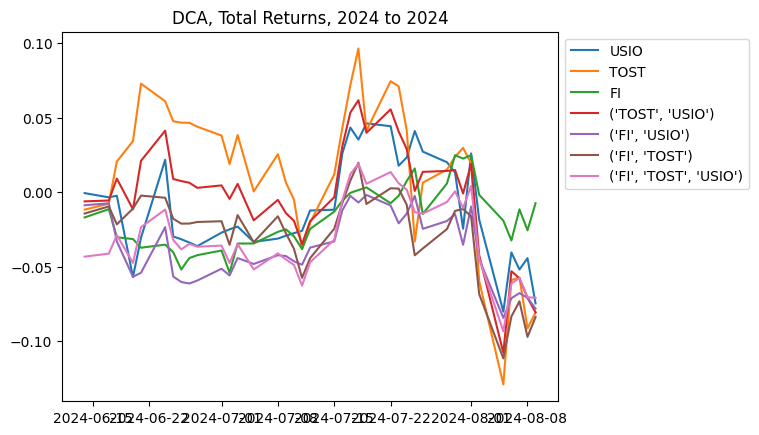

In [11]:

#Graph all '% Gain on Investment' for each strategy onto a single graph
import matplotlib.pyplot as plt
for x in combinations:
    plt.plot(Strategies[x]['Date'], Strategies[x]['% Gain on Investment'], label = x)
    #plt.plot(Strategies[x]['Date'], Strategies[x]['SU.TO Open'], label = x)
    plt.title('DCA, Total Returns, ' + str(start_date.year) + ' to ' + str(end_date.year))
    plt.legend(bbox_to_anchor=(1.0, 1.0))

#plt.plot(Strategies[tuple(sorted((maxKey)))]['Date'], Strategies[tuple(sorted((maxKey)))]['Annualized % Gain on Investment'], label = x)

#Strategies[tuple(sorted(('BITO','BITX')))]

#len(Strategies[tuple(sorted(('BITO','BITX')))].columns)-1



In [ ]:
#Strategies[tuple(sorted((('BITO', 'BITX', 'FNGU', 'SPMO'))))]

#find the strategy with the lowest and highest final 'Annualized % Gain on Investment'
minValue = 100
minKey = ()
maxValue = -100
maxKey = ()
for key, value in Strategies.items():
    if value['Annualized % Gain on Investment'].iloc[-1] > maxValue:
        maxValue = value['Annualized % Gain on Investment'].iloc[-1]
        maxKey = key
for key, value in Strategies.items():
    if value['Annualized % Gain on Investment'].iloc[-1] < minValue:
        minValue = value['Annualized % Gain on Investment'].iloc[-1]
        minKey = key

Strategies[tuple(sorted((minKey)))]
Strategies[tuple(sorted((maxKey)))]

# 365/ (Difference between day 1 and today) * % Gain on Investment


In [37]:
Strategies[tuple(sorted((('USIO', ))))].to_csv('USIO.csv', index = False)


In [ ]:
#pcp and black scholes